In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('MachineToolData.csv')

# Separate features and target
X = data.drop('Replacement Decision', axis=1)
y = data['Replacement Decision']

In [2]:
#Normalise the loaded dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.71428571, 0.54285714, ..., 0.37488869, 0.1875    ,
        0.62666667],
       [0.01010101, 0.78571429, 0.82857143, ..., 0.17364203, 0.53125   ,
        0.87333333],
       [0.02020202, 0.35714286, 0.97142857, ..., 0.09439003, 0.875     ,
        0.78666667],
       ...,
       [0.97979798, 1.        , 0.51428571, ..., 0.460374  , 0.        ,
        0.74      ],
       [0.98989899, 0.64285714, 0.14285714, ..., 0.42297418, 0.234375  ,
        0.28666667],
       [1.        , 0.42857143, 0.42857143, ..., 0.61086376, 0.390625  ,
        0.4       ]])

In [3]:
#split dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

#define model parameters
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your target labels and transform them to numeric representations
y_train_encoded = label_encoder.fit_transform(y_train) # For the training dataset

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
#Train the model
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 2s 609ms/step - loss: 0.6338 - accuracy: 0.8750 - val_loss: 0.6254 - val_accuracy: 0.8750
Epoch 2/100
2/2 [==============================] - 0s 84ms/step - loss: 0.6034 - accuracy: 0.8906 - val_loss: 0.6001 - val_accuracy: 0.8750
Epoch 3/100
2/2 [==============================] - 0s 69ms/step - loss: 0.5740 - accuracy: 0.8906 - val_loss: 0.5776 - val_accuracy: 0.8750
Epoch 4/100
2/2 [==============================] - 0s 69ms/step - loss: 0.5512 - accuracy: 0.8906 - val_loss: 0.5575 - val_accuracy: 0.8750
Epoch 5/100
2/2 [==============================] - 0s 79ms/step - loss: 0.5255 - accuracy: 0.8906 - val_loss: 0.5398 - val_accuracy: 0.8750
Epoch 6/100
2/2 [==============================] - 0s 76ms/step - loss: 0.5076 - accuracy: 0.8906 - val_loss: 0.5231 - val_accuracy: 0.8750
Epoch 7/100
2/2 [==============================] - 0s 82ms/step - loss: 0.4867 - accuracy: 0.8906 - val_loss: 0.5094 - val_accuracy: 0.8750
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 70ms/step - loss: 0.2376 - accuracy: 0.8906 - val_loss: 0.2707 - val_accuracy: 0.8750
Epoch 60/100
2/2 [==============================] - 0s 75ms/step - loss: 0.2334 - accuracy: 0.8906 - val_loss: 0.2659 - val_accuracy: 0.8750
Epoch 61/100
2/2 [==============================] - 0s 72ms/step - loss: 0.2286 - accuracy: 0.8906 - val_loss: 0.2613 - val_accuracy: 0.8750
Epoch 62/100
2/2 [==============================] - 0s 67ms/step - loss: 0.2245 - accuracy: 0.8906 - val_loss: 0.2569 - val_accuracy: 0.8750
Epoch 63/100
2/2 [==============================] - 0s 73ms/step - loss: 0.2208 - accuracy: 0.8906 - val_loss: 0.2522 - val_accuracy: 0.8750
Epoch 64/100
2/2 [==============================] - 0s 66ms/step - loss: 0.2156 - accuracy: 0.8906 - val_loss: 0.2476 - val_accuracy: 0.8750
Epoch 65/100
2/2 [==============================] - 0s 73ms/step - loss: 0.2113 - accuracy: 0.8906 - val_loss: 0.2434 - val_accuracy: 0.8750
Epoch 66/100
2/2 [========

In [6]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit the encoder to your target labels and transform them to numeric representations
y_test_encoded = label_encoder.fit_transform(y_test) # For the testing dataset

#Evaluate losses and accuracy of test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test accuracy:", accuracy) # Diplay Accuracy value

1/1 [==============================] - 0s 73ms/step - loss: 0.2296 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_binary))


1/1 [==============================] - 0s 242ms/step
Accuracy: 0.9
Confusion Matrix:
[[15  2]
 [ 0  3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.60      1.00      0.75         3

    accuracy                           0.90        20
   macro avg       0.80      0.94      0.84        20
weighted avg       0.94      0.90      0.91        20



In [8]:
# Save the model to file
model.save('Machine_Replacement Model.h5')

In [22]:
#Plotting model architecture

import tensorflow as tf
from keras.models import load_model
from keras.utils import plot_model
import pydot
model=load_model('Machine_Replacement Model.h5')
plot_model(model, to_file='model_architecture.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


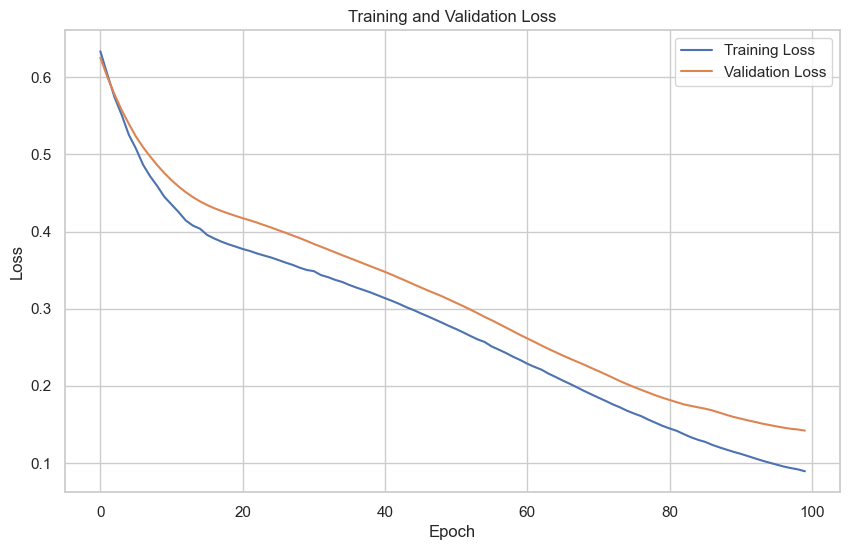

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting training and validation curves
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the plot as an image
plt.savefig('loss_curve.png')
plt.show()


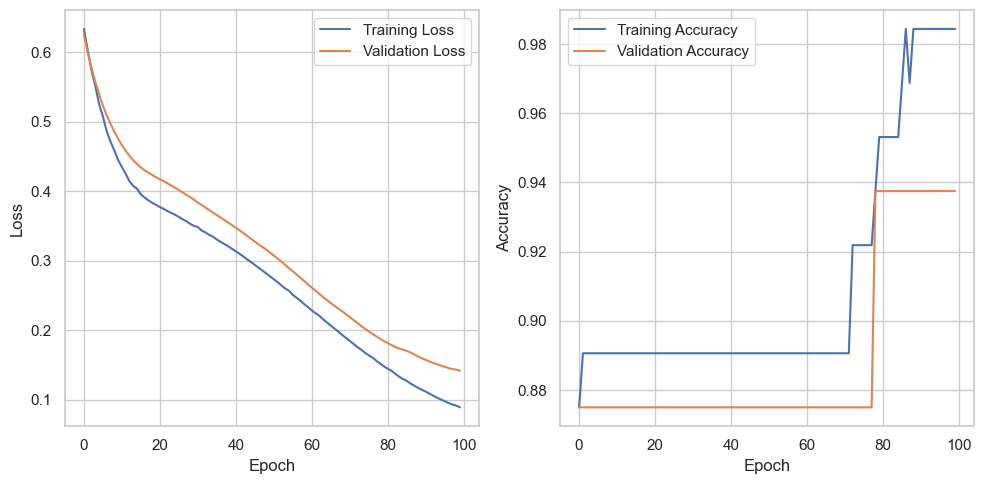

In [29]:
# Plot the learning curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('loss_curve vs Accuracy.png')
plt.show()

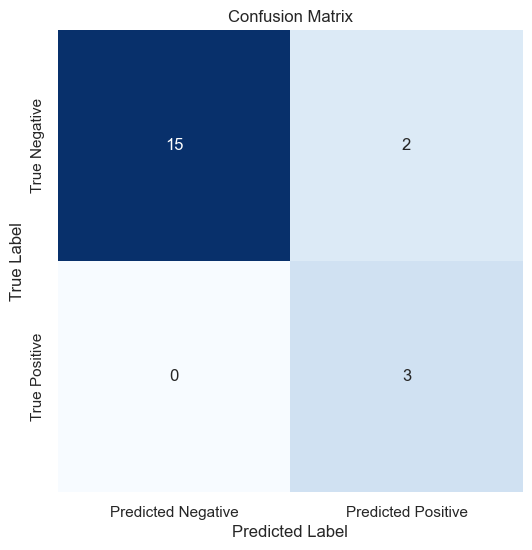

In [28]:
#Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')
plt.show()

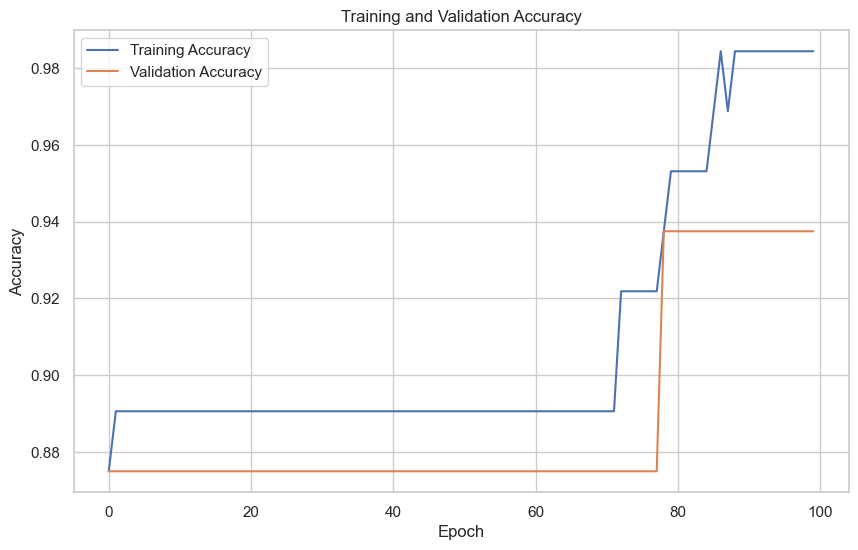

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the Training and Validation Accuracy
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Save the plot as an image
plt.savefig('accuracy_curve.png')
plt.show()
